In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
raw_train_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_values.csv')
raw_train_labels = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/train_labels.csv')
raw_test_features = pd.read_csv('/Users/pamelachavez/AllWomen/Module3/Project2/test_values.csv')


building_id     325083
damage_grade         3
Name: 1039, dtype: int64

### Dealing with categorical variables

In [3]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

### Extracting balanced samples of each class

In [4]:
from random import sample 

level1 = raw_train_labels[raw_train_labels['damage_grade'] == 1]
index1 = list(level1.index.values) 
index1 = sample(index1,333)
index1 = np.array(index1)

level2 = raw_train_labels[raw_train_labels['damage_grade'] == 2]
index2 = list(level2.index.values)
index2 = sample(index2,333)
index2 = np.array(index2)

level3 = raw_train_labels[raw_train_labels['damage_grade'] == 3]
index3 = list(level3.index.values)
index3 = sample(index3,334)
index3 = np.array(index3)

index = np.concatenate((index1, index2, index3), axis=None)

In [5]:
labels = raw_train_labels['damage_grade']
labels = np.array(labels)
labels = labels[index]

features = np.array(extended_train_features)
features = features[index]

### Split data

In [6]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(700, 69)
(700,)
(300, 69)
(300,)


In [7]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### SVM

In [11]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 5)
svm_model.fit(train_features, train_labels)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
svm_prediction = svm_model.predict(test_features)

0.41


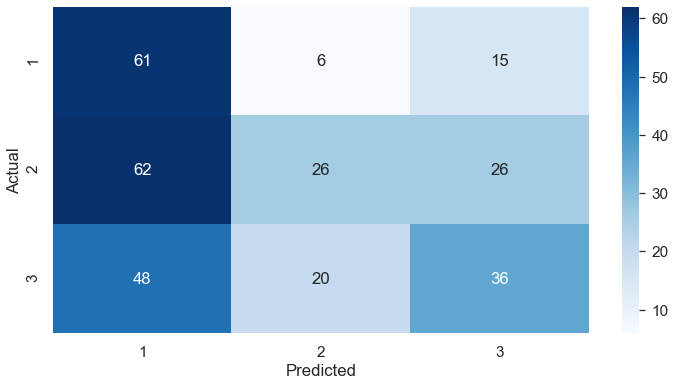

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
svm_cm = confusionMatrix(test_labels, svm_prediction)
svm_accuracy = accuracy_score(test_labels, svm_prediction)
print(accuracy)

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators = 100)
random_model.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
random_prediction = random_model.predict(test_features)

0.51


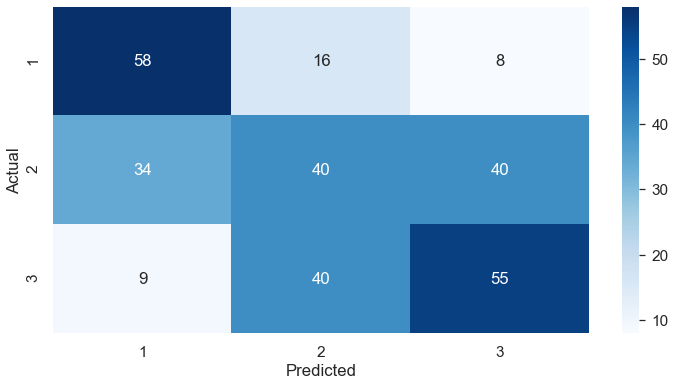

In [21]:
random_cm = confusionMatrix(test_labels, random_prediction)
random_accuracy = accuracy_score(test_labels, random_prediction)
print(random_accuracy)